## NetworkX



In [2]:
#importing csv file

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import sys

data = pd.read_csv("HW1_asset_prices.csv", header=None)
data.head()


Date  EOD~BND.11  EOD~DBC.11  EOD~DIA.11  EOD~EEM.11  EOD~EFA.11  \
0  2017-11-08       81.83       16.40      235.46       46.78       69.87   
1  2017-11-07       81.89       16.43      235.42       46.56       69.64   
2  2017-11-06       81.86       16.53      235.41       46.86       69.90   
3  2017-11-03       81.80       16.22      235.18       46.34       69.80   
4  2017-11-02       81.73       16.12      234.96       46.58       69.91   

   EOD~EMB.11  EOD~EPP.11  EOD~EWG.11  EOD~EWI.11     ...      EOD~VGK.11  \
0      114.60       47.69       33.18       30.95     ...           58.20   
1      114.65       47.22       33.07       31.09     ...           58.17   
2      115.26       47.20       33.34       31.22     ...           58.67   
3      115.42       47.09       33.39       31.22     ...           58.58   
4      116.15       47.31       33.50       31.43     ...           58.69   

   EOD~VPL.11  EOD~VXX.11  EOD~XLB.11  EOD~XLE.11  EOD~XLF.11  EOD~XLK.11  \
0       72.77       33.53       58.70       69.82       26.25       64.01   
1       72.20       33.52       58.64       70.16       26.38       63.66   
2       71.98       33.34       58.58       70.25       26.75       63.63   
3       71.88       33.66       58.83       68.68       26.78       63.49   
4       71.89       33.71       58.86       68.48       26.89       62.99   

   EOD~XLU.11  EOD~CSJ.11  EOD~FXF.11  
0       55.70      104.96     94.5100  
1       55.66      105.01     94.5400  
2       55.00      105.00     94.7500  
3       55.21      105.00     94.4400  
4       55.01      105.04     94.6299  

[5 rows x 40 columns]

In [3]:
#prepare for correlation matrix
data1=data.drop(columns=['Date'])
data1.head()

EOD~BND.11  EOD~DBC.11  EOD~DIA.11  EOD~EEM.11  EOD~EFA.11  EOD~EMB.11  \
0       81.83       16.40      235.46       46.78       69.87      114.60   
1       81.89       16.43      235.42       46.56       69.64      114.65   
2       81.86       16.53      235.41       46.86       69.90      115.26   
3       81.80       16.22      235.18       46.34       69.80      115.42   
4       81.73       16.12      234.96       46.58       69.91      116.15   

   EOD~EPP.11  EOD~EWG.11  EOD~EWI.11  EOD~EWJ.11     ...      EOD~VGK.11  \
0       47.69       33.18       30.95       60.02     ...           58.20   
1       47.22       33.07       31.09       59.65     ...           58.17   
2       47.20       33.34       31.22       59.18     ...           58.67   
3       47.09       33.39       31.22       59.19     ...           58.58   
4       47.31       33.50       31.43       59.05     ...           58.69   

   EOD~VPL.11  EOD~VXX.11  EOD~XLB.11  EOD~XLE.11  EOD~XLF.11  EOD~XLK.11  \
0       72.77       33.53       58.70       69.82       26.25       64.01   
1       72.20       33.52       58.64       70.16       26.38       63.66   
2       71.98       33.34       58.58       70.25       26.75       63.63   
3       71.88       33.66       58.83       68.68       26.78       63.49   
4       71.89       33.71       58.86       68.48       26.89       62.99   

   EOD~XLU.11  EOD~CSJ.11  EOD~FXF.11  
0       55.70      104.96     94.5100  
1       55.66      105.01     94.5400  
2       55.00      105.00     94.7500  
3       55.21      105.00     94.4400  
4       55.01      105.04     94.6299  

[5 rows x 39 columns]

In [4]:
# calculate the correlation matrix and display the results
cor = data1.corr()
cor

EOD~BND.11  EOD~DBC.11  EOD~DIA.11  EOD~EEM.11  EOD~EFA.11  \
EOD~BND.11    1.000000   -0.822062    0.794479    0.069905    0.114368   
EOD~DBC.11   -0.822062    1.000000   -0.574282    0.349666    0.200079   
EOD~DIA.11    0.794479   -0.574282    1.000000    0.468724    0.563945   
EOD~EEM.11    0.069905    0.349666    0.468724    1.000000    0.906563   
EOD~EFA.11    0.114368    0.200079    0.563945    0.906563    1.000000   
EOD~EMB.11    0.912854   -0.600426    0.917934    0.383581    0.412868   
EOD~EPP.11    0.119582    0.325952    0.519725    0.968244    0.881808   
EOD~EWG.11    0.099310    0.228763    0.568437    0.871560    0.961832   
EOD~EWI.11   -0.482615    0.600429   -0.070294    0.609441    0.722791   
EOD~EWJ.11    0.638039   -0.472528    0.897045    0.553773    0.701312   
EOD~EWQ.11    0.133298    0.180010    0.579963    0.830074    0.959346   
EOD~EWU.11   -0.517597    0.742558   -0.122190    0.731485    0.728727   
EOD~FXB.11   -0.881718    0.785573   -0.815277   -0.010376   -0.047338   
EOD~FXC.11   -0.764207    0.959362   -0.539431    0.409094    0.227213   
EOD~FXE.11   -0.751606    0.934234   -0.555548    0.300953    0.178322   
EOD~FXI.11    0.297078   -0.145443    0.540373    0.714284    0.708423   
EOD~FXY.11   -0.215348    0.587160   -0.254213    0.199016    0.014197   
EOD~GDX.11    0.235482    0.260990    0.208053    0.412808    0.224695   
EOD~GLD.11    0.082024    0.397393    0.056570    0.440848    0.253518   
EOD~IEF.11    0.960502   -0.887364    0.616693   -0.161149   -0.115984   
EOD~IYR.11    0.955606   -0.765263    0.856419    0.192315    0.242269   
EOD~JNK.11    0.445421   -0.022564    0.778771    0.820003    0.808507   
EOD~LQD.11    0.971305   -0.694091    0.866714    0.266759    0.286353   
EOD~SLV.11   -0.354167    0.724506   -0.256180    0.371996    0.187288   
EOD~SPY.11    0.842149   -0.641248    0.991233    0.415816    0.517151   
EOD~TIP.11    0.859502   -0.457060    0.753160    0.390606    0.312750   
EOD~TLT.11    0.936742   -0.849735    0.571482   -0.136222   -0.123104   
EOD~USO.11   -0.867886    0.986548   -0.664995    0.266093    0.123862   
EOD~UUP.11    0.675114   -0.898963    0.518790   -0.313187   -0.187701   
EOD~VGK.11   -0.037230    0.333239    0.412195    0.872187    0.975473   
EOD~VPL.11    0.536324   -0.215966    0.875397    0.788827    0.852729   
EOD~VXX.11   -0.900317    0.773717   -0.883305   -0.162012   -0.274274   
EOD~XLB.11    0.597031   -0.238640    0.898652    0.743330    0.759922   
EOD~XLE.11   -0.613705    0.895370   -0.346392    0.522937    0.333035   
EOD~XLF.11    0.689425   -0.509694    0.975872    0.488016    0.596364   
EOD~XLK.11    0.845532   -0.644009    0.988677    0.403966    0.504831   
EOD~XLU.11    0.941027   -0.717165    0.910599    0.239615    0.291689   
EOD~CSJ.11    0.934951   -0.713552    0.917660    0.227668    0.308123   
EOD~FXF.11   -0.769985    0.870505   -0.657030    0.224999    0.135446   

            EOD~EMB.11  EOD~EPP.11  EOD~EWG.11  EOD~EWI.11  EOD~EWJ.11  \
EOD~BND.11    0.912854    0.119582    0.099310   -0.482615    0.638039   
EOD~DBC.11   -0.600426    0.325952    0.228763    0.600429   -0.472528   
EOD~DIA.11    0.917934    0.519725    0.568437   -0.070294    0.897045   
EOD~EEM.11    0.383581    0.968244    0.871560    0.609441    0.553773   
EOD~EFA.11    0.412868    0.881808    0.961832    0.722791    0.701312   
EOD~EMB.11    1.000000    0.449375    0.408301   -0.245520    0.785165   
EOD~EPP.11    0.449375    1.000000    0.859786    0.533985    0.559117   
EOD~EWG.11    0.408301    0.859786    1.000000    0.670526    0.664514   
EOD~EWI.11   -0.245520    0.533985    0.670526    1.000000    0.120915   
EOD~EWJ.11    0.785165    0.559117    0.664514    0.120915    1.000000   
EOD~EWQ.11    0.431202    0.813360    0.964138    0.715726    0.656312   
EOD~EWU.11   -0.246228    0.672423    0.673132    0.896797    0.075002   
EOD~FXB.11   -0.858135   -0.098489   -0.097932    0.579336   -0.653444   
EOD~FXC.11   -0

In [5]:
#get lables and convert data into matrix format
lables = cor.index.values
matrix1 = np.asmatrix(cor)

In [6]:
# convert the matrix into a graph and add lables
G = nx.from_numpy_matrix(matrix1)
G = nx.relabel_nodes(G,lambda x: lables[x])

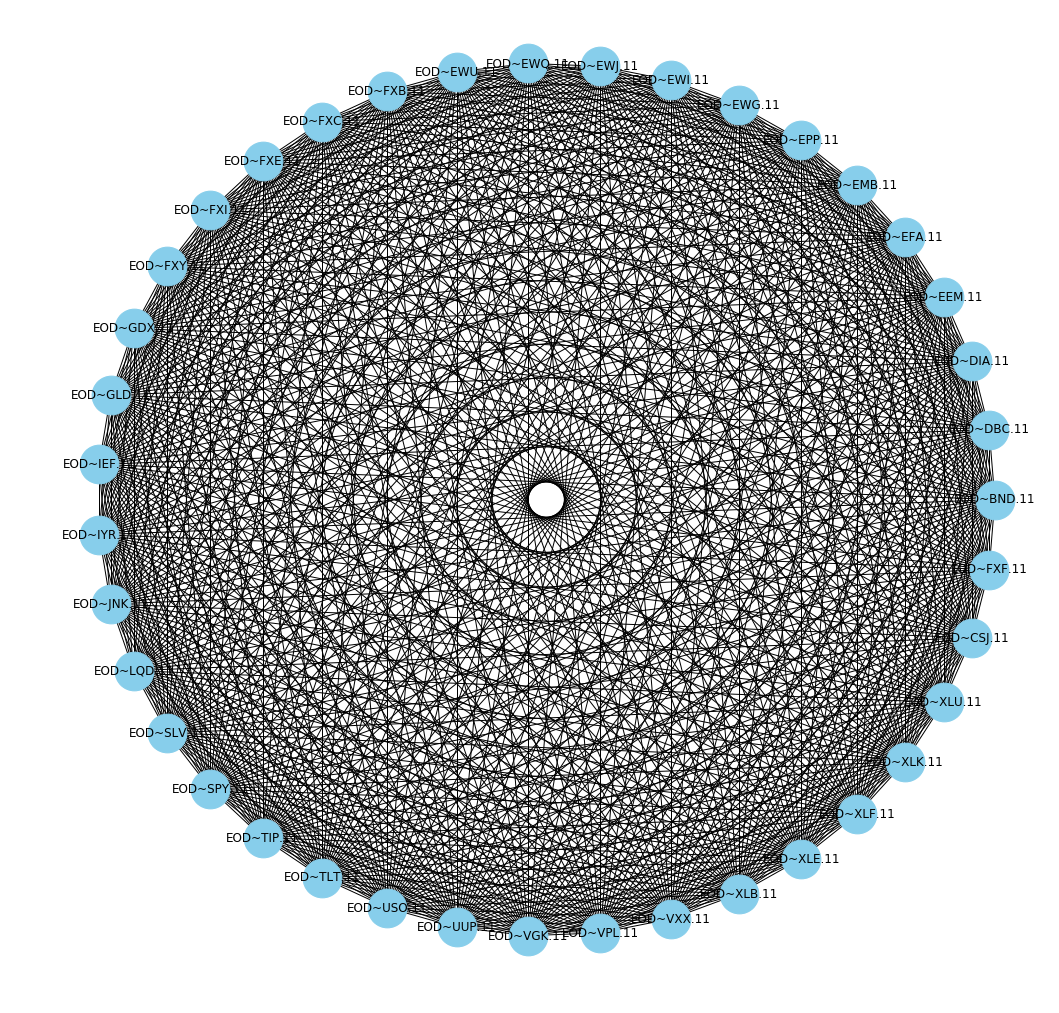

In [7]:
def display (G):
    #using the standard procedure to visualize graphs as outlined in the tutorial
    #draw_circular
    plt.subplots(figsize=(18, 18))
    nx.draw_circular(G, with_labels = True, node_color='skyblue', node_size=1500, \
                   edge_color='black')
display (G) 

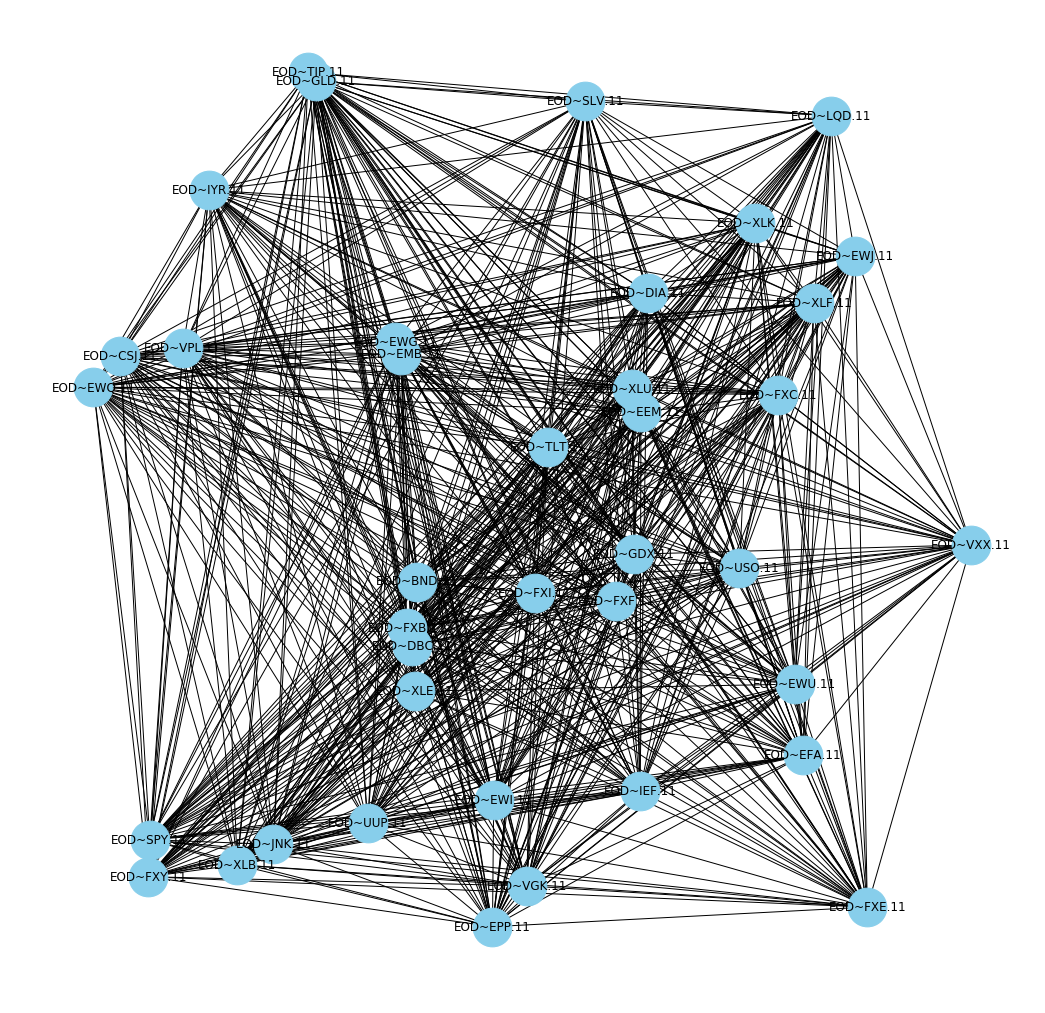

In [8]:
def display2 (G):
#using the standard procedure to visualize graphs as outlined in the tutorial
#draw_random
    plt.subplots(figsize=(18, 18))
    nx.draw_random(G, with_labels = True, node_color='skyblue', node_size=1500, \
                   edge_color='black')
display2 (G) 

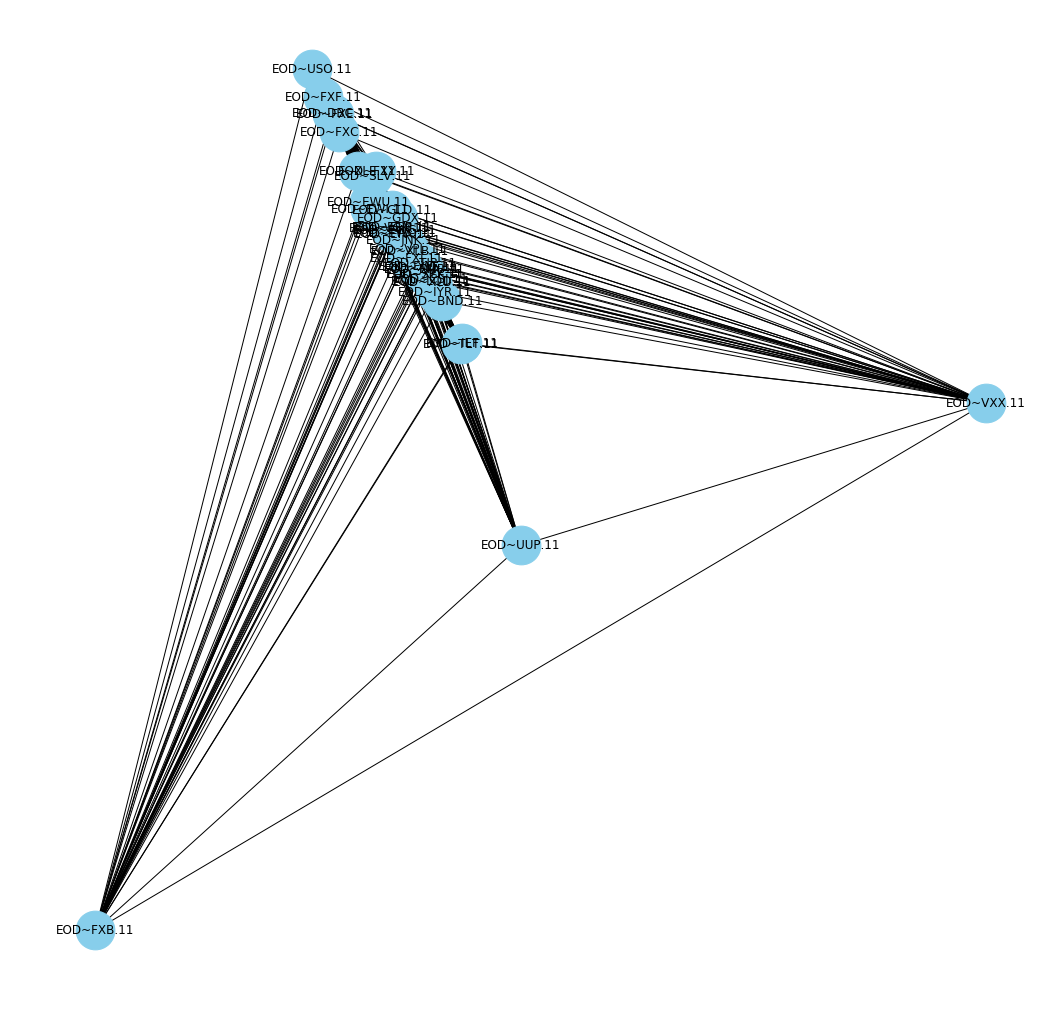

In [9]:
def display3 (G):
#using the standard procedure to visualize graphs as outlined in the tutorial
#draw_spectral
    plt.subplots(figsize=(18, 18))
    nx.draw_spectral(G, with_labels = True, node_color='skyblue', node_size=1500, \
                   edge_color='black')
display3 (G) 

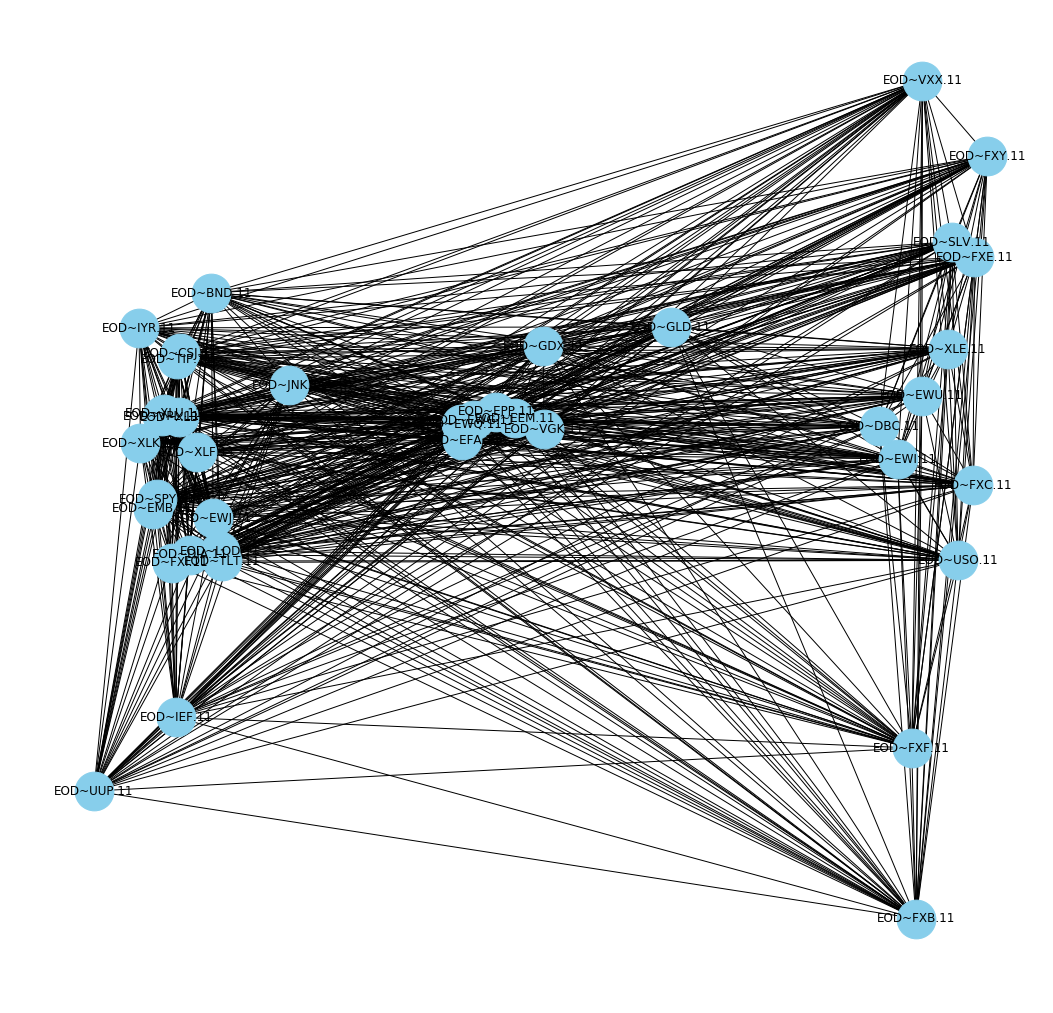

In [10]:
def display4 (G):
#using the standard procedure to visualize graphs as outlined in the tutorial
#draw_spring
    plt.subplots(figsize=(18, 18))
    nx.draw_spring(G, with_labels = True, node_color='skyblue', node_size=1500, \
                   edge_color='black')
display4 (G) 

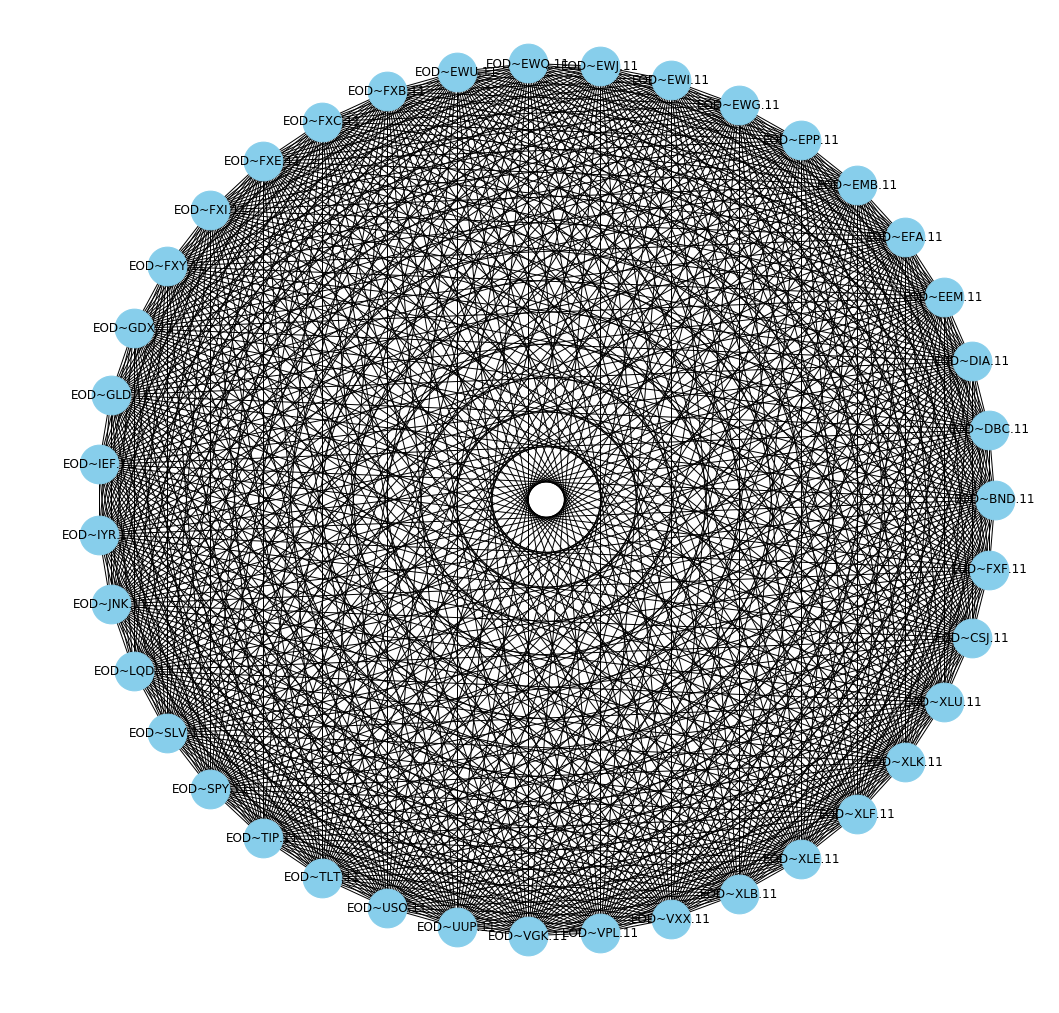

In [11]:
def display5 (G):
#using the standard procedure to visualize graphs as outlined in the tutorial
#draw_shell
    plt.subplots(figsize=(18, 18))
    nx.draw_shell(G, with_labels = True, node_color='skyblue', node_size=1500, \
                   edge_color='black')
display5(G) 

The "draw circular" layout and the "shell" layout, both basically drawing the same graph, appear to be the most appropriate layouts. Compared to the other tested layouts, the "circular" and the "shell" layout manage to display the graph in a somehow readable manner while the other tested layouts appear to be significantly more messier and significantly less interpretable. This conclusion is mainly based on overlapping nodes/edges and the randomness/ missing structure of the nodes' order.

A potential investor is interested in the direction of correlation and the strength of correlation between a pair of stocks to, for example, optimally diversify his portfolio. Hence, it makes sense to split the graph into a graph that shows relevant, positive correlations between stock pairs and into a graph that shows relevant, negative correlations between stock pairs. In this context, the word relevant means to disregard correlations under a certain minimum correlation level. 

By specifying the correlation direction and a minimum correlation level, the below function will return a graph as described in the above lines. Additionally, as demanded, the weight of the edges will be display by a colour scheming and the size of the nodes (stocks) will be determined by the degree of the respective node (in accordance with the chosen minimum correlation level). Therefore, a potential investor has a handy visualization tool to see which stock correlates in which direction and with which strength with other stocks.

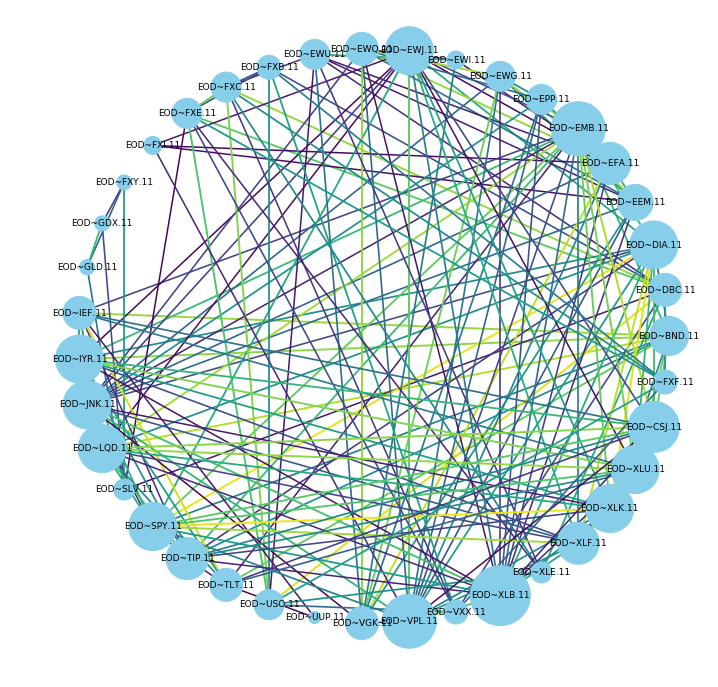

In [35]:
def split(G, cor, min_cor):
    
    C = G.copy()
    
    #remove the edges that are not within the boundries of the specified correlation direction and the specified minimum correlation
    for A, B, weight in G.edges(data=True):   
        if cor == "+":
            if weight["weight"] <0 or weight["weight"] < min_cor:
                C.remove_edge(A, B)
        else:
            if weight["weight"] >=0 or weight["weight"] > min_cor:
                C.remove_edge(A, B)
                
    #extract edges and corresponding weight information into a new list         
    edges,weights = zip(*nx.get_edge_attributes(C,'weight').items())
    
    #extract degree information 
    d = nx.degree(C)
    
    #put extreacted information into two seperate list, one with the indices and one with degree values
    nodesize = []
    nodelist = []
    for item, value in d:
        nodesize.append(value)
        nodelist.append(item)
        
    #linearly enlarging weights for displaying purposes
    weights = tuple([1+abs(x)**2 for x in weights])
    
    #standard drwaing procedure with according to networkx drawing documentation
    plt.subplots(figsize=(12, 12))
    nx.draw_circular(C, with_labels = True, node_color='skyblue', node_size=tuple([(x*3)**2 for x in nodesize]), nodelist=tuple(nodelist),  \
                   edge_color=weights, width=weights, edge_vmin = min(weights), edge_vmax=max(weights), font_size=9 )
    
split(G, '+', 0.7)

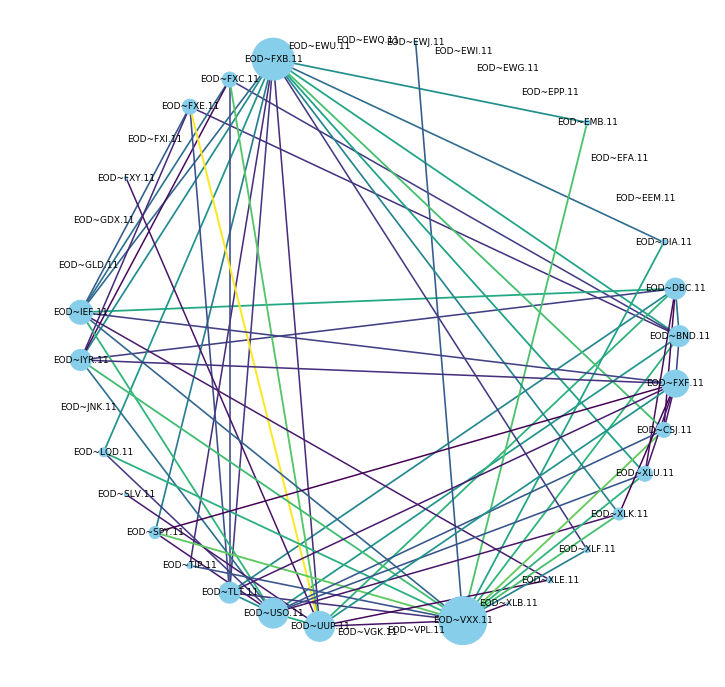

In [34]:
split(G, "-",-0.7)